In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [26]:
dataset1 = pd.read_csv('MyMLData.csv')
X = dataset1[['Input']].values
y = dataset1[['Output']].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [28]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [30]:
# Name:
# Register Number:
class NeuralNet(nn.Module):
  def __init__(self):
        super().__init__()
        # Include your code here
        self.fc = nn.Linear(1, 1)  # Simple linear layer for single input/output

  def forward(self, x):
        return self.fc(x)

In [31]:
# Initialize the Model, Loss Function, and Optimizer
# Write your code here
ai_brain = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(ai_brain.parameters(), lr=0.01)

In [32]:
# Name:AADITHYAN R
# Register Number:212222230001
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
    # Write your code here
    ai_brain.history = {'loss': []}
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = ai_brain(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        ai_brain.history['loss'].append(loss.item())
        if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')

In [33]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)


Epoch [0/2000], Loss: 13.500545
Epoch [200/2000], Loss: 1.634975
Epoch [400/2000], Loss: 0.427325
Epoch [600/2000], Loss: 0.257970
Epoch [800/2000], Loss: 0.148241
Epoch [1000/2000], Loss: 0.079269
Epoch [1200/2000], Loss: 0.041638
Epoch [1400/2000], Loss: 0.023784
Epoch [1600/2000], Loss: 0.016444
Epoch [1800/2000], Loss: 0.013849


In [34]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')


Test Loss: 2.068104


In [35]:
loss_df = pd.DataFrame(ai_brain.history)

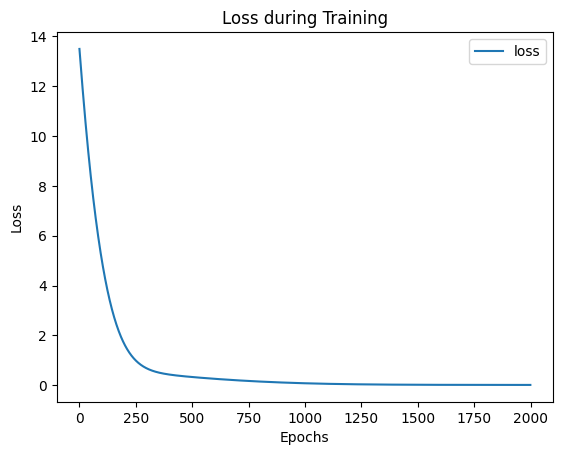

In [36]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [37]:
X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 7.7599897384643555


In [38]:
# Create a dummy MyMLData.csv file with sample data
data = {'Input': [1, 2, 3, 4, 5], 'Output': [2, 4, 5, 4, 5]}
df = pd.DataFrame(data)
df.to_csv('MyMLData.csv', index=False)